# Read the Dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:

df=pd.read_csv("Unemployment in India.csv")
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


# Exploratory Data Analysis

In [4]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [5]:
df.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [6]:
# columns to check for null values
columns_to_check = ['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area']

# Identify rows where any of the specified columns have null values
null_rows = df[df[columns_to_check].isnull().any(axis=1)]

# Print the rows
print(null_rows)

    Region  Date  Frequency   Estimated Unemployment Rate (%)  \
359    NaN   NaN        NaN                               NaN   
360    NaN   NaN        NaN                               NaN   
361    NaN   NaN        NaN                               NaN   
362    NaN   NaN        NaN                               NaN   
363    NaN   NaN        NaN                               NaN   
364    NaN   NaN        NaN                               NaN   
365    NaN   NaN        NaN                               NaN   
366    NaN   NaN        NaN                               NaN   
367    NaN   NaN        NaN                               NaN   
368    NaN   NaN        NaN                               NaN   
369    NaN   NaN        NaN                               NaN   
370    NaN   NaN        NaN                               NaN   
371    NaN   NaN        NaN                               NaN   
372    NaN   NaN        NaN                               NaN   
754    NaN   NaN        N

In [7]:
# DROP THE NULL VALUES
df_cleaned = df.dropna(subset=columns_to_check)

# Print the cleaned DataFrame
print(df_cleaned)


             Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0    Andhra Pradesh   31-05-2019    Monthly                              3.65   
1    Andhra Pradesh   30-06-2019    Monthly                              3.05   
2    Andhra Pradesh   31-07-2019    Monthly                              3.75   
3    Andhra Pradesh   31-08-2019    Monthly                              3.32   
4    Andhra Pradesh   30-09-2019    Monthly                              5.17   
..              ...          ...        ...                               ...   
749     West Bengal   29-02-2020    Monthly                              7.55   
750     West Bengal   31-03-2020    Monthly                              6.67   
751     West Bengal   30-04-2020    Monthly                             15.63   
752     West Bengal   31-05-2020    Monthly                             15.22   
753     West Bengal   30-06-2020    Monthly                              9.86   

      Estimated Employed   

In [8]:
# Check there still any null values
df_cleaned.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64

In [9]:
df_cleaned.dtypes

Region                                       object
 Date                                        object
 Frequency                                   object
 Estimated Unemployment Rate (%)            float64
 Estimated Employed                         float64
 Estimated Labour Participation Rate (%)    float64
Area                                         object
dtype: object

In [10]:
# Convert 'Date' column to datetime format
df_cleaned[' Date'] = pd.to_datetime(df_cleaned[' Date'])


C:\Users\HP\AppData\Local\Temp\ipykernel_6884\1192127611.py:2: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_cleaned[' Date'] = pd.to_datetime(df_cleaned[' Date'])
C:\Users\HP\AppData\Local\Temp\ipykernel_6884\1192127611.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[' Date'] = pd.to_datetime(df_cleaned[' Date'])


In [11]:
df_cleaned.dtypes

Region                                              object
 Date                                       datetime64[ns]
 Frequency                                          object
 Estimated Unemployment Rate (%)                   float64
 Estimated Employed                                float64
 Estimated Labour Participation Rate (%)           float64
Area                                                object
dtype: object

In [12]:
df_cleaned[' Date'].unique()

<DatetimeArray>
['2019-05-31 00:00:00', '2019-06-30 00:00:00', '2019-07-31 00:00:00',
 '2019-08-31 00:00:00', '2019-09-30 00:00:00', '2019-10-31 00:00:00',
 '2019-11-30 00:00:00', '2019-12-31 00:00:00', '2020-01-31 00:00:00',
 '2020-02-29 00:00:00', '2020-03-31 00:00:00', '2020-04-30 00:00:00',
 '2020-05-31 00:00:00', '2020-06-30 00:00:00']
Length: 14, dtype: datetime64[ns]

In [13]:
# We now know that we have the Data from 2019-2020. Lets read the data in detail and try to draw meaningful Insights from it

In [14]:
df_cleaned_2019 = df_cleaned[df_cleaned[' Date'].dt.year == 2019]
df_cleaned_2019 

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
743,West Bengal,2019-08-31,Monthly,7.27,11456493.0,46.77,Urban
744,West Bengal,2019-09-30,Monthly,7.79,11158649.0,45.74,Urban
745,West Bengal,2019-10-31,Monthly,7.83,10563686.0,43.25,Urban
746,West Bengal,2019-11-30,Monthly,6.61,10768462.0,43.44,Urban


In [15]:
# Access data for January 2020
january_2019 = df_cleaned[(df_cleaned[' Date'].dt.year == 2019) & (df_cleaned[' Date'].dt.month == 1)]
january_2019.info()


<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Region                                    0 non-null      object        
 1    Date                                     0 non-null      datetime64[ns]
 2    Frequency                                0 non-null      object        
 3    Estimated Unemployment Rate (%)          0 non-null      float64       
 4    Estimated Employed                       0 non-null      float64       
 5    Estimated Labour Participation Rate (%)  0 non-null      float64       
 6   Area                                      0 non-null      object        
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 0.0+ bytes


In [16]:
df_cleaned_2020 = df_cleaned[df_cleaned[' Date'].dt.year == 2020]
df_cleaned_2020 

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
8,Andhra Pradesh,2020-01-31,Monthly,4.84,12016676.0,43.46,Rural
9,Andhra Pradesh,2020-02-29,Monthly,5.91,11723617.0,42.83,Rural
10,Andhra Pradesh,2020-03-31,Monthly,4.06,11359660.0,40.66,Rural
11,Andhra Pradesh,2020-04-30,Monthly,16.29,8792827.0,36.03,Rural
12,Andhra Pradesh,2020-05-31,Monthly,14.46,9526902.0,38.16,Rural
...,...,...,...,...,...,...,...
749,West Bengal,2020-02-29,Monthly,7.55,10871168.0,44.09,Urban
750,West Bengal,2020-03-31,Monthly,6.67,10806105.0,43.34,Urban
751,West Bengal,2020-04-30,Monthly,15.63,9299466.0,41.20,Urban
752,West Bengal,2020-05-31,Monthly,15.22,9240903.0,40.67,Urban


# DATA VISUALISATION

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

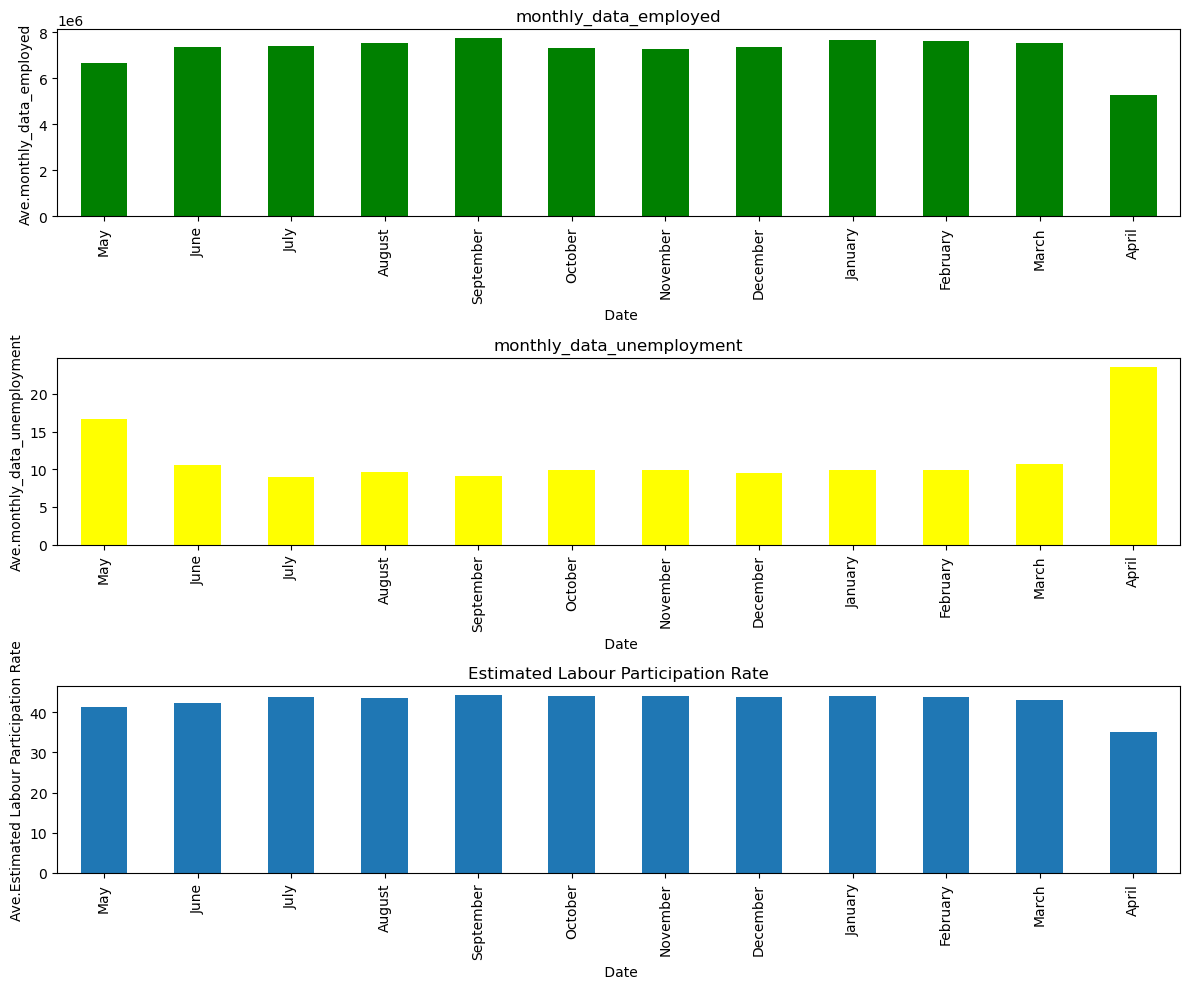

In [33]:
# Plotting to visualise the Individual data monthly wise
plt.figure(figsize=(12, 10))

# Plot 1: Average Estimated Employed by Monthplt.subplot(3,1,1)
plt.subplot(3,1,1)
monthly_data_employed = df_cleaned.groupby(df_cleaned[' Date'].dt.strftime('%B'), sort=False)[' Estimated Employed'].mean()
monthly_data_employed.plot(kind='bar', color='green')
plt.title('monthly_data_employed')
plt.ylabel('Ave.monthly_data_employed')


# Plot 2: Average Estimated Unemployment Rate by Month
plt.subplot(3,1,2)
monthly_data_unemployment = df_cleaned.groupby(df_cleaned[' Date'].dt.strftime('%B'), sort=False)[' Estimated Unemployment Rate (%)'].mean()
monthly_data_unemployment.plot(kind='bar', color='yellow')
plt.title('monthly_data_unemployment')
plt.ylabel('Ave.monthly_data_unemployment')


 # plot3: Average estimated  Estimated Labour Participation Rate (%) by month:
plt.subplot(3,1,3)
Labour_Participation_Rate = df_cleaned.groupby(df_cleaned[' Date'].dt.strftime('%B'), sort=False)[' Estimated Labour Participation Rate (%)'].mean()
Labour_Participation_Rate.plot(kind='bar')
plt.title('Estimated Labour Participation Rate')
plt.ylabel('Ave.Estimated Labour Participation Rate')



# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()

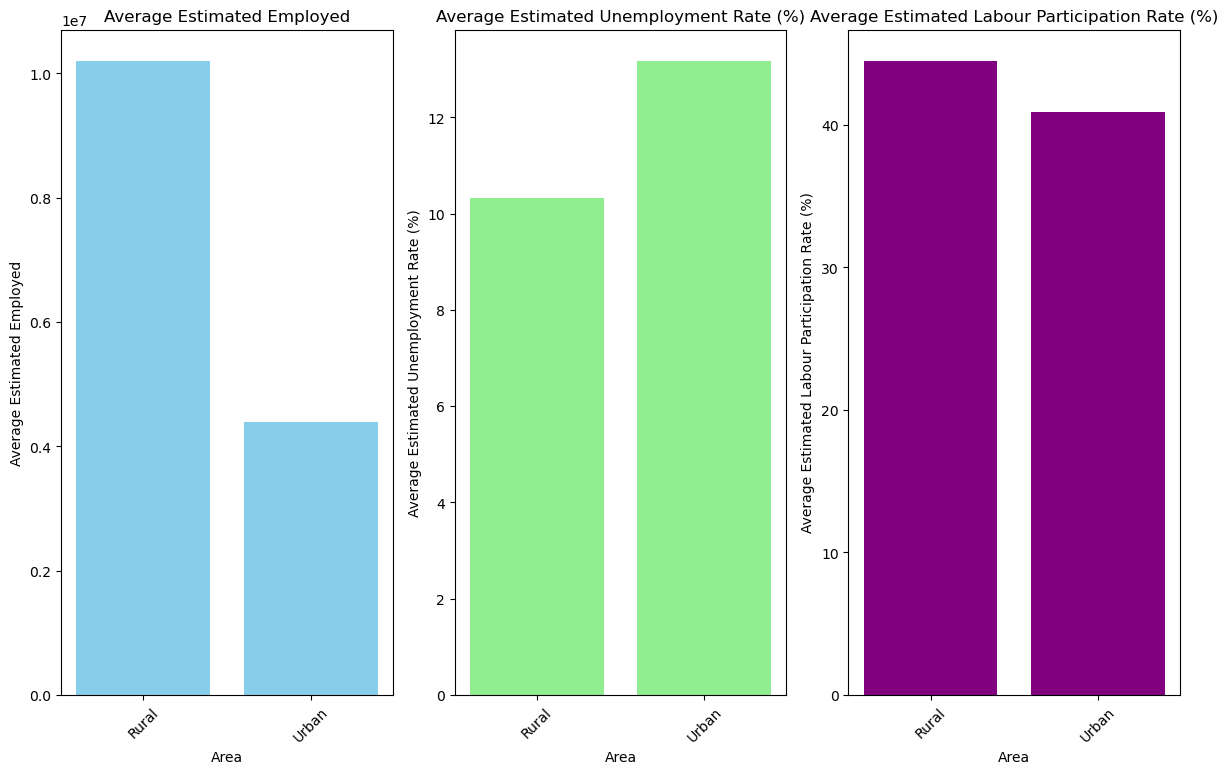

In [79]:
# Plotting to visualise the Individual data Area wise
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,8))

# Plot 1: Average Estimated Employed by Month
monthly_data_employed = df_cleaned.groupby(df_cleaned['Area'])[' Estimated Employed'].mean()
axes[0].bar(monthly_data_employed.index, monthly_data_employed, color='skyblue')
axes[0].set_title('Average Estimated Employed')
axes[0].set_xlabel('Area')
axes[0].set_ylabel('Average Estimated Employed')
axes[0].tick_params(axis='x', rotation=45)

# Plot 2: Average Estimated Unemployment Rate by Area
monthly_data_unemployment = df_cleaned.groupby('Area')[' Estimated Unemployment Rate (%)'].mean()
axes[1].bar(monthly_data_unemployment.index, monthly_data_unemployment, color='lightgreen')
axes[1].set_title('Average Estimated Unemployment Rate (%)')
axes[1].set_xlabel('Area')
axes[1].set_ylabel('Average Estimated Unemployment Rate (%)')
axes[1].tick_params(axis='x', rotation=45)

# Plot 3: Average Estimated Labour Participation Rate by Area
monthly_data_participation = df_cleaned.groupby('Area')[' Estimated Labour Participation Rate (%)'].mean()
axes[2].bar(monthly_data_participation.index, monthly_data_participation, color='purple')
axes[2].set_title('Average Estimated Labour Participation Rate (%)')
axes[2].set_xlabel('Area')
axes[2].set_ylabel('Average Estimated Labour Participation Rate (%)')
axes[2].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()

C:\Users\HP\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1000x600 with 0 Axes>

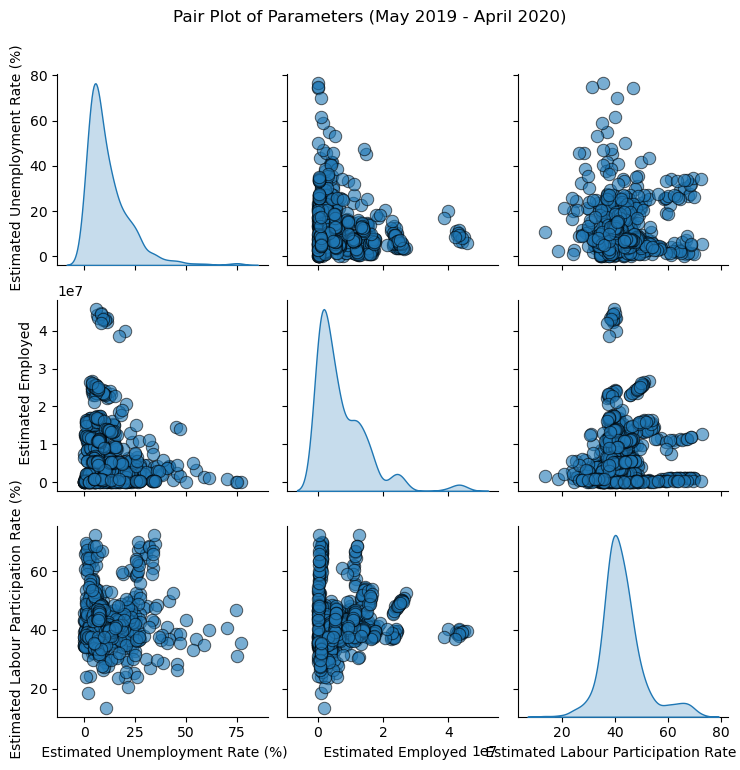

In [55]:

# Plot pairplots using seaborn
plt.figure(figsize=(10, 6))
sns.pairplot(df_cleaned, vars=[' Estimated Unemployment Rate (%)', ' Estimated Employed', ' Estimated Labour Participation Rate (%)'],
             diag_kind='kde', kind='scatter', plot_kws={'alpha':0.6, 's':80, 'edgecolor':'k'})
plt.suptitle('Pair Plot of Parameters (May 2019 - April 2020)', y=1.02)
plt.tight_layout()

plt.show()